# Preparação do ambiente

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

## Constantes e funções auxiliares

In [2]:
FILE_AMAZON_CLEAN_TARGETS = '../datasets/amazon_clean_targets.partet'

# Carga e prepação dos dados

In [3]:
df_amazon_clean_targets = pd.read_parquet(FILE_AMAZON_CLEAN_TARGETS)

unique_targets = df_amazon_clean_targets.target.value_counts().index
map_targets_name_to_int = {target:i for i,target in enumerate(unique_targets)}
map_targets_int_to_name = {k:v for v,k in map_targets_name_to_int.items()}

df_amazon_clean_targets['target_int'] = df_amazon_clean_targets['target'].map(map_targets_name_to_int)

df_amazon_clean_targets

,Link,nome,descricao,cat_full,target,target_int
0,https://www.amazon.com.br/Especiais-Cinematic-...,filtro lente efeitos especiais blue streak cam...,modelo aplicavel filtro listras azuis adequado...,Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...,Outros,0
1,https://www.amazon.com.br/UKCOCO-Filtro-lente-...,ukcoco filtro cpl lente celular 37 mm lente un...,reflexoes eliminacao polarizadores cpl sao usa...,Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...,Outros,0
2,https://www.amazon.com.br/REYGEAK-Conjunto-ace...,reygeak conjunto filtros nd cpl dji mini 4 pro...,reygeak conjunto filtros nd feito especificame...,Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...,Outros,0
3,https://www.amazon.com.br/REYGEAK-ND-Mini-pola...,reygeak conjunto filtros nd cpl dji mini 4 pro...,projetado especificamente mini 4 pro clipes pl...,Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...,Outros,0
4,https://www.amazon.com.br/REYGEAK-filtros-vari...,reygeak kit filtros lente nd variavel osmo poc...,reygeak filtro variavel nd 2-32 nd 64-512 ofer...,Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...,Outros,0
...,...,...,...,...,...,...
51371,https://www.amazon.com.br/Albums-Produced-Jame...,albums produced james iha aeroplane flies high...,,"Livros|Inglês e Outras Línguas|Arte, Cinema e ...",Outros,0
51372,https://www.amazon.com.br/Nike-Swim-Sting-Jamm...,nike swim masculino fade sting jammers preto,92 poliester 8 elastano costuras planas reduzi...,"Moda|Masculino|Acessórios|Chapéus, Toucas e Bo...",Outros,0
51373,https://www.amazon.com.br/Laurence-Crane-Drone...,drones scales objects,,CD e Vinil|Clássica|Música de Câmara|#NULO#|#N...,Outros,0
51374,https://www.amazon.com.br/Gatorade-Powder-Flav...,gatorade zero powder 3 flavor variety pack 50 ...,,"Alimentos e Bebidas|Café, Chá e outras Bebidas...",Outros,0


In [4]:
df_amazon_clean_targets[df_amazon_clean_targets['nome'].str.contains('shuguo')]['cat_full'].unique()

array(['Eletrônicos e Tecnologia|Celulares e Comunicação|Acessórios|Manutenção e Reparos|Peças de Reposição|#NULO#',
       'Computadores e Informática|Acessórios|Cabos e Acessórios|Cabos|Cabos USB|#NULO#',
       'Eletrônicos e Tecnologia|Celulares e Comunicação|Acessórios|Manutenção e Reparos|Ferramentas e Acessórios de Chip|#NULO#'],
      dtype=object)

In [5]:
# X_outros = df_amazon_clean_targets[df_amazon_clean_targets['target_int']==0]['nome']
# y_outros = df_amazon_clean_targets[df_amazon_clean_targets['target_int']==0]['target_int']

# X = df_amazon_clean_targets[df_amazon_clean_targets['target_int']>0]['nome']
# y = df_amazon_clean_targets[df_amazon_clean_targets['target_int']>0]['target_int']

X = df_amazon_clean_targets['nome']
y = df_amazon_clean_targets['target_int']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=724)

# Experimentos: escolha do classificador base

In [6]:
clf_dummy = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', DummyClassifier())])
clf_dummy.fit(X_train,y_train)
predicted = clf_dummy.predict(X_test)
np.mean(predicted == y_test)

0.5787916536904392

In [7]:
clf_nb = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
clf_nb.fit(X_train,y_train)

predicted = clf_nb.predict(X_test)
np.mean(predicted == y_test)

0.7657271877919651

In [8]:
clf_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

clf_sgd.fit(X_train, y_train)
predicted = clf_sgd.predict(X_test)
np.mean(predicted == y_test)

0.8040330115228901

In [9]:
clf_tree = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(max_depth=15, random_state=42)),
])

clf_tree.fit(X_train, y_train)
predicted = clf_tree.predict(X_test)
np.mean(predicted == y_test)

0.7802086577390221

In [10]:
clf_rf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(max_depth=15, n_estimators=10, max_features=1, random_state=42)),
])

clf_rf.fit(X_train, y_train)
predicted = clf_rf.predict(X_test)
np.mean(predicted == y_test)


0.5787916536904392

In [11]:
weak_learner = DecisionTreeClassifier(max_leaf_nodes=8)
n_estimators = 300
clf_ada = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=n_estimators,
    algorithm="SAMME",
    random_state=42,))])

clf_ada.fit(X_train, y_train)
predicted = clf_ada.predict(X_test)
np.mean(predicted == y_test)

0.7395671130488944

# Próximos experimentos

In [12]:
vect = TfidfVectorizer(min_df=5,ngram_range=(1,1))
X_train_tfidf = vect.fit_transform(X_train)
X_test_tfidf = vect.transform(X_test)

clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
clf.fit(X_train_tfidf,y_train)
predicted = clf.predict(X_test_tfidf)
np.mean(predicted == y_test)

0.8093273123637497

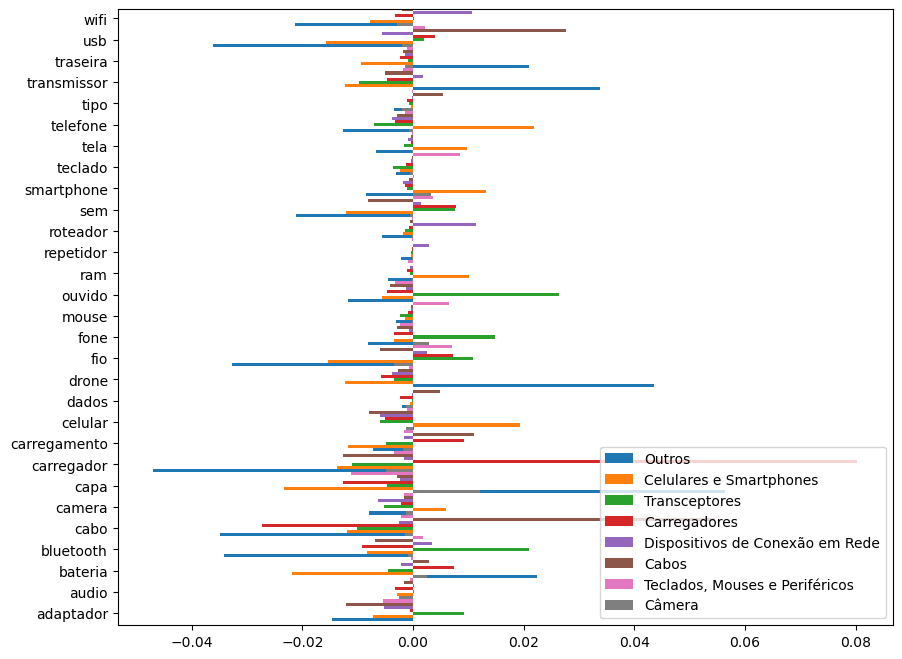

In [26]:
import matplotlib.pyplot as plt

average_feature_effects = clf.coef_ * np.asarray(X_train_tfidf.mean(axis=0)).ravel()
feature_names = vect.get_feature_names_out()
target_names = list(map_targets_name_to_int.keys())

for i, label in enumerate(target_names):
    top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
    if i == 0:
        top = pd.DataFrame(feature_names[top5], columns=[label])
        top_indices = top5
    else:
        top[label] = feature_names[top5]
        top_indices = np.concatenate((top_indices, top5), axis=None)
top_indices = np.unique(top_indices)
predictive_words = feature_names[top_indices]

# plot feature effects
bar_size = 0.25
padding = 0.75
y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

fig, ax = plt.subplots(figsize=(10, 8))
for i, label in enumerate(target_names):
    ax.barh(
        y_locs + (i - 2) * bar_size,
        average_feature_effects[i, top_indices],
        height=bar_size,
        label=label,
    )
ax.set(
    yticks=y_locs,
    yticklabels=predictive_words,
    ylim=[
        0 - 4 * bar_size,
        len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
    ],
)
ax.legend(loc="lower right")

In [27]:
top

,Outros,Celulares e Smartphones,Transceptores,Carregadores,Dispositivos de Conexão em Rede,Cabos,"Teclados, Mouses e Periféricos",Câmera
0,capa,telefone,ouvido,carregador,roteador,cabo,teclado,camera
1,drone,celular,bluetooth,carregamento,wifi,usb,fio,wifi
2,transmissor,smartphone,fone,sem,bluetooth,carregamento,mouse,sem
3,bateria,ram,fio,bateria,repetidor,tipo,sem,fio
4,traseira,tela,adaptador,fio,fio,dados,usb,audio
